In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotnine import *

In [2]:
df = pd.read_csv('final_permit_data.csv')

In [3]:
df.head(3)

,permit,parcel,owner,contractor,neighborhood,ward,clean_ward,cost,issued,year,mn,address,geocoder_recognized_address,lon,lat,structure_type,work description,work_type,high_cost,area
0,11-b-03000,0048s00284000000,pfohl donald e & lucy g (w),nh construction llc,not_listed,6,6,200000.0,1/30/2012 0:00,2012,1,"3418 penn avenue, pittsburgh, pa","3418 Penn Ave, Pittsburgh, PA 15201-1304, Unit...",-79.96646,40.46286,not_listed,interior fitout for yoga studio\n-pittsburgh b...,not_listed,1,Lower Lawrenceville
1,11-b-03019,0006r00206000000,p7 investments lp,heartland homes inc,not_listed,19,19,100000.0,1/4/2012 0:00,2012,1,"435 sweetbriar street, pittsburgh, pa","435 Sweetbriar St, Pittsburgh, PA 15211-1121, ...",-80.02220,40.43474,not_listed,new 3 story single family dwelling with 2 car ...,not_listed,1,Mt Washington_Beechview
2,11-b-03021,0006r00206000000,dugan timothy,heartland homes inc,not_listed,19,19,100000.0,1/4/2012 0:00,2012,1,"437 sweetbriar street 435, pittsburgh, pa","435 Sweetbriar St, Pittsburgh, PA 15211-1121, ...",-80.02220,40.43474,not_listed,new 3 story single family dwelling with 2 car ...,not_listed,1,Mt Washington_Beechview


## Additional cleaning for work

### Add a clean area name if needed for graphs

In [5]:
sorted(df.neighborhood.unique().tolist())

['allegheny center',
 'allegheny west',
 'allegheny west;north shore;allegheny center',
 'allentown',
 'arlington',
 'banksville',
 'bedford dwellings',
 'beechview',
 'beltzhoover',
 'beltzhoover;bon air',
 'beltzhoover;bon air;knoxville',
 'bloomfield',
 'bluff',
 'bon air',
 'brighton heights',
 'brighton heights;marshall-shadeland',
 'brookline',
 'brookline;overbrook',
 'california-kirkbride',
 'carrick',
 'carrick;bon air',
 'carrick;knoxville',
 'carrick;overbrook',
 'central business district',
 'central business district;morningside',
 'central lawrenceville',
 'central lawrenceville;lower lawrenceville',
 'central lawrenceville;stanton heights',
 'central northside',
 'central oakland',
 'central oakland;north oakland',
 'central oakland;squirrel hill south;squirrel hill north',
 'chartiers city',
 'chateau',
 'crafton heights',
 'crawford-roberts',
 'duquesne heights',
 'east allegheny',
 'east carnegie',
 'east hills',
 'east liberty',
 'elliott',
 'esplen',
 'fairywood',
 

In [46]:
nbrhd = {3: 'Lower Hill District',
4: 'Oakland_Soho',
5: 'Upper Hill District',
8: 'Bloomfield',
11: 'East Liberty_Highland Park',
12: 'Lincoln_Lemington_Belmar',
13: 'Homewood',
14: 'Pt Breeze_Squirrel Hill',
15: 'Hazelwood_Greenfield',
16: 'South Side_Arlington',
31: 'Hays_Lincoln Place',
20: 'West End',
28: 'Chartiers',
29: 'Carrick',
30: 'Knoxville',
32: 'Overbrook',
2: 'Strip District',
6: 'Lower Lawrenceville',
9: 'Central Lawrenceville',
10: 'Upper Lawrenceville_Morningside',
17: 'South Side',
18: 'Allentown',
21: 'Manchester',
22: 'North Side',
23: 'East Allegheny',
24: 'Troy Hill_Spring Garden',
25: 'Fineview',
26: 'Perrysville_Riverview',
1: 'Ctr Business District_Bluff',
7: 'Shadyside',
19: 'Mt Washington_Beechview',
27: 'Marshall_Shadeland'}

In [47]:
df['area'] = df.clean_ward.apply(lambda x: nbrhd[x])

## EDA

### Create a df that drops no-cost permits since they can mess with visualizations, explore no cost ones

In [5]:
df2 = df[df.cost>=50]

In [8]:
nocost = df[df.cost<50]

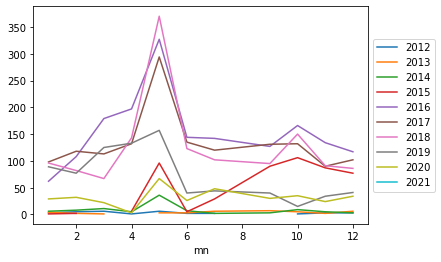

In [14]:
# Huge uptick in "co cost" permits 2016 - 2018.... 
nocost.groupby(['year','mn']).size().unstack(0).plot().legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

In [82]:
nocost.groupby(['year','area']).size().unstack(0).replace(np.nan,0).astype('int')

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
area,,,,,,,,,,
Allentown,0,0,1,11,38,32,26,15,0,0
Bloomfield,2,1,4,16,66,47,56,28,6,1
Carrick,0,0,2,15,26,28,50,10,7,1
Central Lawrenceville,5,1,2,25,86,74,73,29,15,1
Chartiers,0,0,1,10,26,26,24,7,3,0
Ctr Business District_Bluff,0,2,2,23,65,62,83,50,26,2
East Allegheny,1,0,2,12,26,36,25,12,6,1
East Liberty_Highland Park,1,1,2,24,64,42,54,34,9,4
Fineview,1,0,2,12,28,40,32,19,8,0


In [85]:
nocost.groupby(['year','area']).size().unstack(0).replace(np.nan,0).astype('int').sum(axis=1).sort_values(ascending=False)

area
Pt Breeze_Squirrel Hill            521
Strip District                     497
Mt Washington_Beechview            332
Oakland_Soho                       327
Ctr Business District_Bluff        315
Central Lawrenceville              311
Upper Lawrenceville_Morningside    292
Lower Lawrenceville                264
Hazelwood_Greenfield               241
East Liberty_Highland Park         235
Shadyside                          233
Bloomfield                         227
North Side                         225
Homewood                           219
South Side                         204
West End                           185
South Side_Arlington               169
Marshall_Shadeland                 153
Upper Hill District                147
Lincoln_Lemington_Belmar           145
Fineview                           142
Carrick                            139
Perrysville_Riverview              138
Allentown                          123
East Allegheny                     121
Manchester          

In [89]:
ttl_by_area = df.groupby(['year','area']).size().unstack(0).replace(np.nan,0).astype('int').sum(axis=1)
nocost_by_area = nocost.groupby(['year','area']).size().unstack(0).replace(np.nan,0).astype('int').sum(axis=1)

In [92]:
compare = pd.DataFrame({'total':ttl_by_area,'nocost':nocost_by_area})

In [93]:
compare['prop_nocost'] = compare.total/compare.nocost

### On closer inspection, nothing appears to be out of the ordinary at a negihborhood level in terms of the volume of no- to very low-cost permits - overall, each neighborhood has seen 8-14% or so have no cost

In [111]:
compare

,total,nocost,prop_nocost
area,,,
Allentown,1136,123,9.235772
Bloomfield,2442,227,10.757709
Carrick,1078,139,7.755396
Central Lawrenceville,3316,311,10.662379
Chartiers,1139,97,11.742268
Ctr Business District_Bluff,3243,315,10.295238
East Allegheny,1187,121,9.809917
East Liberty_Highland Park,3513,235,14.948936
Fineview,1552,142,10.929577


In [116]:
compare.drop(index='Lower Lawrenceville').index.values

array(['Allentown', 'Bloomfield', 'Carrick', 'Central Lawrenceville',
       'Chartiers', 'Ctr Business District_Bluff', 'East Allegheny',
       'East Liberty_Highland Park', 'Fineview', 'Hays_Lincoln Place',
       'Hazelwood_Greenfield', 'Homewood', 'Knoxville',
       'Lincoln_Lemington_Belmar', 'Lower Hill District', 'Manchester',
       'Marshall_Shadeland', 'Mt Washington_Beechview', 'North Side',
       'Oakland_Soho', 'Overbrook', 'Perrysville_Riverview',
       'Pt Breeze_Squirrel Hill', 'Shadyside', 'South Side',
       'South Side_Arlington', 'Strip District',
       'Troy Hill_Spring Garden', 'Upper Hill District',
       'Upper Lawrenceville_Morningside', 'West End'], dtype=object)

10.522727272727273

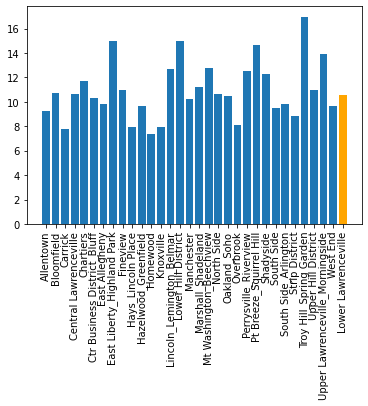

In [128]:
#compare['prop_nocost'].plot.bar()
plt.bar(compare.drop(index='Lower Lawrenceville').index.values, height=compare.drop(index='Lower Lawrenceville')['prop_nocost'])
plt.bar('Lower Lawrenceville', height=compare.loc['Lower Lawrenceville','prop_nocost'], color='orange')
plt.xticks(rotation=90) 
plt.show()

In [4]:
len(df)

70959

In [6]:
len(df2)

64554

### Explore others

In [15]:
df2.groupby(['year','area']).agg({'cost':['sum','median','mean','count']}).round()

cost                         
                                             sum   median      mean count
year area                                                                
2012 Allentown                          764255.0   8398.0   25475.0    30
     Bloomfield                       22613399.0  21000.0  314075.0    72
     Carrick                            575082.0   5650.0   23962.0    24
     Central Lawrenceville            11473228.0  15000.0  102440.0   112
     Chartiers                          982018.0   7500.0   23381.0    42
...                                          ...      ...       ...   ...
2021 Strip District                   10877490.0  76600.0  293986.0    37
     Troy Hill_Spring Garden            358000.0  25000.0   89500.0     4
     Upper Hill District                909136.0   5400.0   37881.0    24
     Upper Lawrenceville_Morningside    669019.0   5832.0   13938.0    48
     West End                            59585.0   4239.0    7448.0     8

[319 rows x 4 columns]

In [16]:
near = [3,5,6,8,9,10,23,24]
yrs = list(range(2012,2021))

In [17]:
df2[df2.clean_ward.isin(near) & df2.year.isin(yrs)].groupby(['year','clean_ward']).agg({'cost':'sum'}).unstack(1)

cost                                                      \
clean_ward           3            5            6            8            9    
year                                                                          
2012         3210248.25   7827476.00  11147202.18  22613399.00  11473228.34   
2013         6839268.00  23414144.00   6404731.00  49542693.00   5159272.00   
2014         8639786.00   1866242.00   4986478.00  23880332.00   9123713.00   
2015        30576034.00  12065471.00  43151422.00  17413054.00  10672329.00   
2016         5498763.00  14940002.00  47724485.00   9660905.64  57564966.00   
2017        28757199.00  17129966.00  44502055.00  49762934.00  28619914.00   
2018        25253753.00   4088761.00  13901418.25  21829596.00  28947896.00   
2019         5494824.00   2521325.43  36912936.00  27423879.72  22198082.00   
2020        12855055.55  36487752.72  90304392.77  52318766.01  11648784.29   

                                                  
clean_ward           10           23          24  
year                                              
2012         1975869.82   3704626.00   1004706.0  
2013         3168825.00   1726573.13   1281969.0  
2014         3769799.00   2476983.00    448069.0  
2015         8123449.00   3428039.00   1253922.0  
2016        10376031.00  24643204.00   1486736.6  
2017        31564248.00  12201320.00   2887559.0  
2018        16754607.00   9792409.00   3451331.0  
2019        25203984.37   5720940.58  11313463.0  
2020        17747584.95  13729389.00   3162660.0

In [18]:
adjacent_wards = df2[df2.clean_ward.isin(near) & df2.year.isin(yrs)].groupby(['year','clean_ward'])

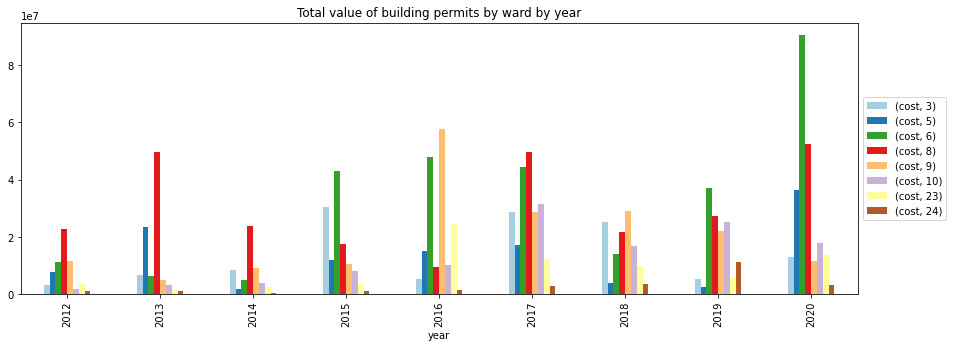

In [19]:
adjacent_wards.agg({'cost':'sum'}).unstack(1).plot.bar(
    figsize=[15,5], title='Total value of building permits by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

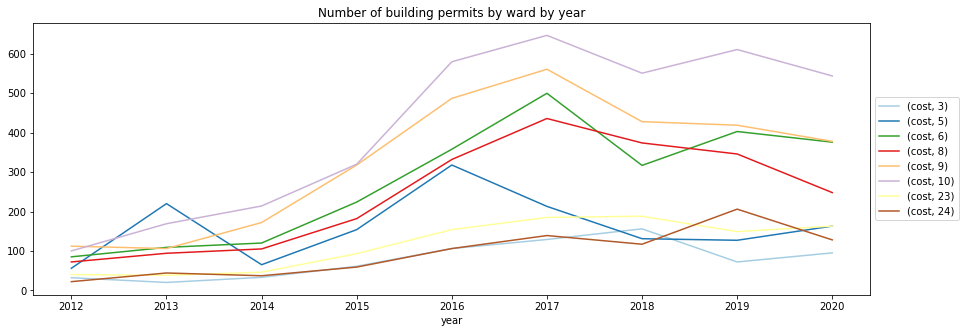

In [20]:
adjacent_wards.agg({'cost':'count'}).unstack(1).plot(
    figsize=[15,5],title='Number of building permits by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

#### Above makes clear permits also ticked up in rest of Lawrenceville and Bloomfield

In [21]:
# Though we do not have all splits on residential v. commercial, look at the typical cost of such permits
df.groupby(['structure_type', 'year']).median()

clean_ward     cost    mn        lon  \
structure_type              year                                         
commercial                  2019         8.0  38665.0   9.0 -79.969300   
                            2020         7.0  36000.0   6.0 -79.977210   
                            2021         7.0  36500.0   1.0 -79.970185   
commercial - all other uses 2019         9.0  16250.0   9.0 -79.975670   
                            2020         8.0  17000.0   6.0 -79.976710   
                            2021         6.5  21670.0   1.0 -79.979680   
not_listed                  2012        14.0  15000.0   6.0 -79.965190   
                            2013        14.0  13472.5   6.0 -79.968450   
                            2014        14.0   9661.5   6.0 -79.960760   
                            2015        14.0   6000.0   9.0 -79.963840   
                            2016        13.0   4758.0   6.0 -79.963930   
                            2017        13.0   5431.0   5.0 -79.965280   
                            2018        13.0   5100.0   6.0 -79.966725   
                            2019        12.0   6000.0   3.0 -79.962760   
                            2020         9.0   3250.0   6.0 -79.976680   
                            2021        12.0   8000.0   1.0 -79.952770   
residential                 2019        13.0   7635.0  10.0 -79.954960   
                            2020        14.0   7000.0   7.0 -79.958110   
                            2021        13.0   6873.0   1.0 -79.959460   
residential - single family 2019        14.0   5000.0   9.0 -79.957800   
                            2020        14.0   6001.0   6.0 -79.959190   
                            2021        14.0   5500.0   1.0 -79.958130   
residential - two-family    2019        15.0   5000.0   9.0 -79.965890   
                            2020        15.0   5725.5   6.0 -79.967310   
                            2021        14.0  23000.0   1.0 -79.976600   

                                        lat  high_cost  
structure_type              year                        
commercial                  2019  40.444940        1.0  
                            2020  40.446300        1.0  
                            2021  40.444970        1.0  
commercial - all other uses 2019  40.444940        1.0  
                            2020  40.447200        1.0  
                            2021  40.446120        1.0  
not_listed                  2012  40.447305        1.0  
                            2013  40.446485        0.0  
                            2014  40.448650        0.0  
                            2015  40.449855        0.0  
                            2016  40.448550        0.0  
                            2017  40.450540        0.0  
                            2018  40.449420        0.0  
                            2019  40.449620        0.0  
                            2020  40.446770        0.0  
                            2021  40.441400        0.0  
residential                 2019  40.457630        0.0  
                            2020  40.457050        0.0  
                            2021  40.461300        0.0  
residential - single family 2019  40.452775        0.0  
                            2020  40.451965        0.0  
                            2021  40.456260        0.0  
residential - two-family    2019  40.455650        0.0  
                            2020  40.455890        0.0  
                            2021  40.452610        1.0

It looks like the typical residential permit is 5-7k range while the typical commerical permit is 15+. This could be a basic gauge for looking at a split between high- and low-value permits by ward.

In [22]:
df2['high_cost'] = df2.cost.apply(lambda x: 1 if x >= 15000 else 0)

In [23]:
df2.groupby(['year','area']).agg({'cost': 'count','high_cost':['sum','median','mean']})

cost high_cost                 
                                     count       sum median      mean
year area                                                            
2012 Allentown                          30        11    0.0  0.366667
     Bloomfield                         72        38    1.0  0.527778
     Carrick                            24         7    0.0  0.291667
     Central Lawrenceville             112        58    1.0  0.517857
     Chartiers                          42         9    0.0  0.214286
...                                    ...       ...    ...       ...
2021 Strip District                     37        23    1.0  0.621622
     Troy Hill_Spring Garden             4         3    1.0  0.750000
     Upper Hill District                24         9    0.0  0.375000
     Upper Lawrenceville_Morningside    48        12    0.0  0.250000
     West End                            8         1    0.0  0.125000

[319 rows x 4 columns]

In [24]:
proportion_high = df2.groupby(['year','clean_ward']).agg({'cost': 'count','high_cost':['sum','median','mean']}).iloc[:,0:2]

In [25]:
proportion_high['prop_high'] = proportion_high.iloc[:,1]/proportion_high.iloc[:,0]

In [26]:
proportion_high['prop_high'].loc[yrs,near].unstack(1).iloc[:,:-1].round(3)

clean_ward,3,5,6,8,9,10,23
year,,,,,,,
2012,0.625,0.268,0.518,0.528,0.518,0.290,0.700
2013,0.650,0.818,0.523,0.447,0.453,0.325,0.421
2014,0.485,0.185,0.450,0.448,0.483,0.276,0.652
2015,0.525,0.526,0.371,0.313,0.346,0.262,0.344
2016,0.311,0.267,0.307,0.289,0.275,0.209,0.305
2017,0.620,0.192,0.360,0.369,0.298,0.323,0.368
2018,0.333,0.305,0.319,0.313,0.304,0.258,0.319
2019,0.292,0.299,0.400,0.457,0.327,0.275,0.409
2020,0.347,0.423,0.447,0.407,0.362,0.261,0.466


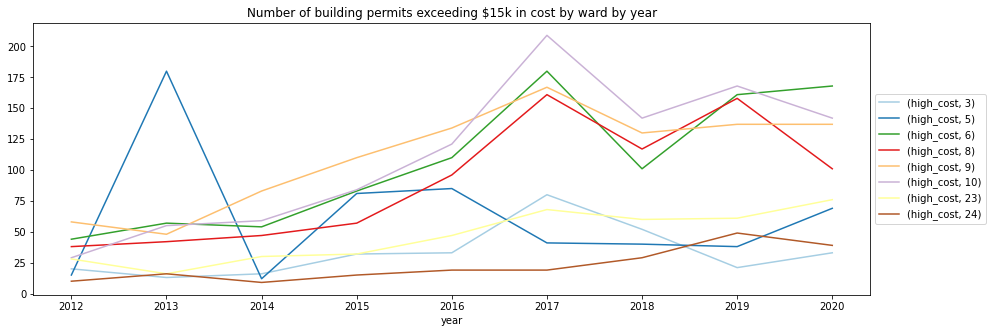

In [27]:
adjacent_wards.agg({'high_cost':'sum'}).unstack(1).plot(
    figsize=[15,5],title='Number of building permits exceeding $15k in cost by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

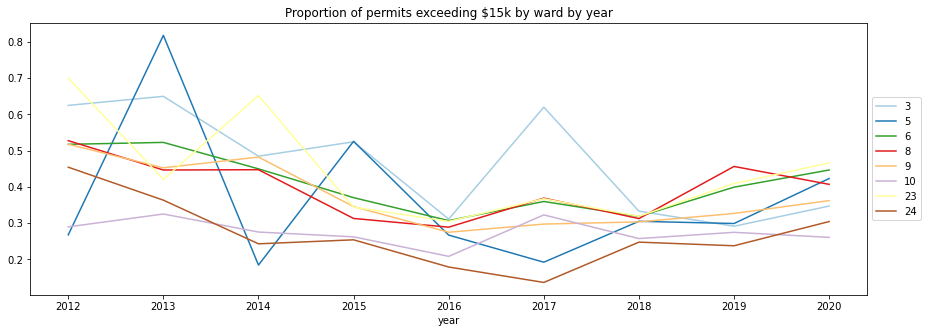

In [28]:
proportion_high['prop_high'].loc[yrs,near].unstack(1).plot(
    figsize=[15,5],title='Proportion of permits exceeding $15k by ward by year', colormap='Paired').legend(
    loc='center left',bbox_to_anchor=(1.0, 0.5))

In [29]:
LL = df2[df2.clean_ward==6].groupby(['year','mn']).agg({'cost':['sum','mean','count'],'high_cost':['sum']})
LL

cost                      high_cost
                 sum           mean count       sum
year mn                                            
2012 1     225500.00   75166.666667     3         2
     2     149165.00   29833.000000     5         4
     3      29545.34    5909.068000     5         0
     4     354000.00  118000.000000     3         2
     5     208778.00   16059.846154    13         5
...              ...            ...   ...       ...
2020 9   17015859.25  447785.769737    38        17
     10   1246970.00   40224.838710    31         9
     11    564399.00   28219.950000    20         4
     12   3526655.00   97962.638889    36        14
2021 1    1138248.00   51738.545455    22         7

[100 rows x 4 columns]

In [30]:
LL.loc[:,'cost'].loc[2012, 'sum']

mn
1      225500.00
2      149165.00
3       29545.34
4      354000.00
5      208778.00
6     3206700.00
7      102800.00
9      560500.00
10     327857.00
11    5865496.84
12     116860.00
Name: sum, dtype: float64

In [31]:
dat = {}
for i in yrs:
    dat[i] = df2[df2.clean_ward==6].groupby('year').get_group(i)['cost'].reset_index(drop=True)

In [32]:
LLannual = pd.DataFrame(dat)

In [33]:
summ = LLannual.describe().round()
summ

,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,85.0,109.0,120.0,224.0,358.0,500.0,317.0,403.0,376.0
mean,131144.0,58759.0,41554.0,192640.0,133309.0,89004.0,43853.0,91595.0,240171.0
std,658027.0,254588.0,123786.0,1107888.0,1135596.0,460433.0,130701.0,370408.0,1506151.0
min,440.0,525.0,200.0,50.0,70.0,85.0,100.0,90.0,100.0
25%,5000.0,5000.0,3950.0,2800.0,2501.0,3000.0,2000.0,3500.0,4500.0
50%,15000.0,15000.0,10000.0,7000.0,7000.0,8350.0,7200.0,10000.0,10544.0
75%,40000.0,35000.0,30000.0,45962.0,20000.0,35000.0,23500.0,32000.0,70500.0
max,5578765.0,2550000.0,1160000.0,11000000.0,15000000.0,7418850.0,1302212.0,3781000.0,24500000.0


<AxesSubplot:label='139caa96-0b3c-4907-84a2-4da96b0b1d90'>

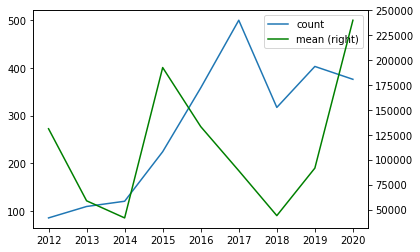

In [34]:
summ.loc['count'].plot(legend=True);
summ.loc['mean'].plot(secondary_y=True, style="g", legend=True)

<AxesSubplot:>

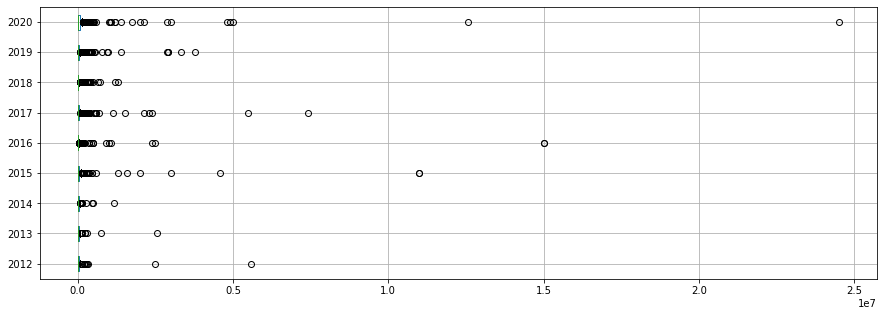

In [35]:
LLannual.boxplot(vert=False, figsize=(15,5))

In [36]:
LLannual

,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,200000.0,15000.0,30000.0,2000000.0,1000.0,10000.0,500.0,4000.0,34500.0
1,5500.0,10000.0,60000.0,61320.0,100000.0,50000.0,12000.0,20000.0,1200000.0
2,20000.0,21000.0,7500.0,329850.0,6500.0,1000.0,25000.0,173000.0,138000.0
3,79000.0,10000.0,30000.0,60000.0,15200.0,16000.0,950.0,3000.0,9982.0
4,3165.0,750000.0,75000.0,2000.0,100000.0,2000.0,3000.0,12200.0,50000.0
...,...,...,...,...,...,...,...,...,...
495,NaN,NaN,NaN,NaN,NaN,3000.0,NaN,NaN,NaN
496,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN


In [37]:
LLannual[2012].dropna()

0     200000.0
1       5500.0
2      20000.0
3      79000.0
4       3165.0
        ...   
80     45000.0
81       500.0
82     18145.0
83      5000.0
84      3215.0
Name: 2012, Length: 85, dtype: float64

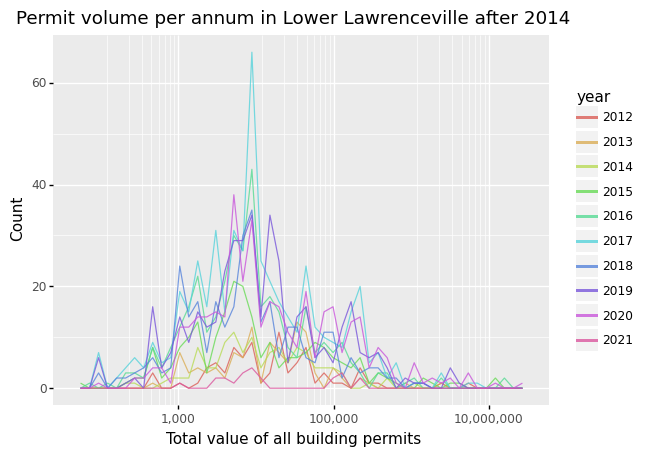

<ggplot: (109655034365)>

In [57]:
(
    ggplot(df2[df2.clean_ward==6].astype({'year':'str'}), aes(x='cost', color='year'))
    + geom_freqpoly(alpha=0.8, position="identity", bins=50) 
    + scale_x_log10(labels=['0','1,000','100,000','10,000,000'])
    + xlab('Total value of all building permits')
    + ylab('Count')
    + ggtitle('Permit volume per annum in Lower Lawrenceville after 2014')
)

In [58]:
LL_permits_per_annum = (
    ggplot(df2[df2.clean_ward==6].astype({'year':'str'}), aes(x='cost', color='year'))
    + geom_freqpoly(alpha=0.8, position="identity", bins=50) 
    + scale_x_log10(labels=['0','1,000','100,000','10,000,000'])
    + xlab('Total value of all building permits')
    + ylab('Count')
    + ggtitle('Permit volume per annum in Lower Lawrenceville after 2014')
)

In [60]:
save_as_pdf_pages([LL_permits_per_annum], 'LL_permits_per_annum.pdf')

C:\Users\danie\anaconda_3\lib\site-packages\plotnine\ggplot.py:848: PlotnineWarning: Filename: LL_permits_per_annum.pdf


In [97]:
df2[df2.clean_ward==6].astype({'year':'str'})

,permit,parcel,owner,contractor,neighborhood,ward,clean_ward,cost,issued,year,mn,address,geocoder_recognized_address,lon,lat,structure_type,work description,work_type,high_cost,area
0,11-b-03000,0048s00284000000,pfohl donald e & lucy g (w),nh construction llc,not_listed,6.0,6.0,200000.0,2012-01-30 00:00:00,2012,1,"3418 penn avenue, pittsburgh, pa","3418 Penn Ave, Pittsburgh, PA 15201-1304, Unit...",-79.96646,40.46286,not_listed,interior fitout for yoga studio\n-pittsburgh b...,not_listed,1,Lower Lawrenceville
123,12-b-00150,0026e00077000000,visco marcus,jd anderson inc,not_listed,6.0,6.0,5500.0,2012-01-30 00:00:00,2012,1,"3226 dobson street, pittsburgh, pa","3226 Dobson St, Pittsburgh, PA 15219-3790, Uni...",-79.96471,40.45785,not_listed,repair building damages from vehicle****owner ...,not_listed,0,Lower Lawrenceville
130,12-b-00164,0049j00319000000,sipes chad & lori (w),sipes & son general contractors,not_listed,6.0,6.0,20000.0,2012-01-31 00:00:00,2012,1,"3818 butler street, pittsburgh, pa","3818 Butler St, Pittsburgh, PA 15201-1822, Uni...",-79.96380,40.46726,not_listed,interior & exterior renovations both floors,not_listed,1,Lower Lawrenceville
157,11-b-03729,0049k00027000000,scatena gino & linda (w),saccocione cement and asphalt,not_listed,6.0,6.0,79000.0,2012-02-14 00:00:00,2012,2,"288 39th street, pittsburgh, pa","288 39th St, Pittsburgh, PA 15201-1835, United...",-79.96125,40.46539,not_listed,"new construction of 2 story, 23' x 52' single ...",not_listed,1,Lower Lawrenceville
189,12-b-00193,0025m00151000000,malinowski edmund a & aurelia m (w),thermo twin industries,not_listed,6.0,6.0,3165.0,2012-02-03 00:00:00,2012,2,"3027 brereton street, pittsburgh, pa","3027 Brereton St, Pittsburgh, PA 15219-3705, U...",-79.96899,40.45683,not_listed,replacement windows in 3 story single family d...,not_listed,0,Lower Lawrenceville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70936,13-b-00168,0080g00265000000,fry christopher j,john hancock contracting,not_listed,10,6.0,28000.0,1/29/2013,2013,1,"5113 keystone street, pittsburgh, pa","5113 Keystone St, Pittsburgh, PA 15201-2539, U...",-79.95396,40.47776,not_listed,interior renovations (rear house aka 5112 natr...,not_listed,1,Lower Lawrenceville
70938,13-b-00156,0049c00125000000,monahan richard r,schiavo & son general contractors,not_listed,9,6.0,2000.0,1/28/2013,2013,1,"288 46th street, pittsburgh, pa","288 46th St, Pittsburgh, PA 15201-2867, United...",-79.95634,40.47090,not_listed,building permit only,not_listed,0,Lower Lawrenceville
70944,13-b-00162,0080d00294000000,eko development llc,e properties & development,not_listed,10,6.0,4000.0,1/29/2013,2013,1,"5211 kent way, pittsburgh, pa","5211 Kent Way, Pittsburgh, PA 15201-2535, Unit...",-79.95227,40.47948,not_listed,interior renovations and windows and exterior ...,not_listed,0,Lower Lawrenceville
70953,13-b-00161,0049c00215000000,scarlet yarn llc (the),tennis roofing & asphalt inc,not_listed,9,6.0,1000.0,1/29/2013,2013,1,"4603 carlton street, pittsburgh, pa","4603 Carlton St, Pittsburgh, PA 15201-1743, Un...",-79.95597,40.47114,not_listed,repair roof***sfd***,not_listed,0,Lower Lawrenceville
